# Handwritten Digit Recognition
This tutorial guides you through a classic computer vision application: identify hand written digits with neural networks.

In [1]:
'''Trains a simple deep NN on the MNIST dataset.

Gets to 98.40% test accuracy after 20 epochs
(there is *a lot* of margin for parameter tuning).
2 seconds per epoch on a GPU.
'''

from __future__ import print_function
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import RMSprop
from keras.utils import np_utils
from keras.callbacks import TensorBoard


Using TensorFlow backend.


Setting up some hyper-parameters (try others yourself)

In [2]:
batch_size = 128
nb_classes = 10
nb_epoch = 20

## Load data
We first fetch the MNIST dataset, which is a commonly used dataset for handwritten digit recognition. Each image in this dataset has been resized into 28x28 with grayscale value between 0 and 254. The following codes download and load the images and the according labels into numpy.

In [3]:
# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

If you are using Jupyter themes (_pip install jupyterthemes_), you need to apply the changes to the plots as well:

In [4]:
# import jtplot submodule from jupyterthemes
from jupyterthemes import jtplot

# currently installed theme will be used to
# set plot style if no arguments provided
jtplot.style()

We plot the first 9 images and their classes

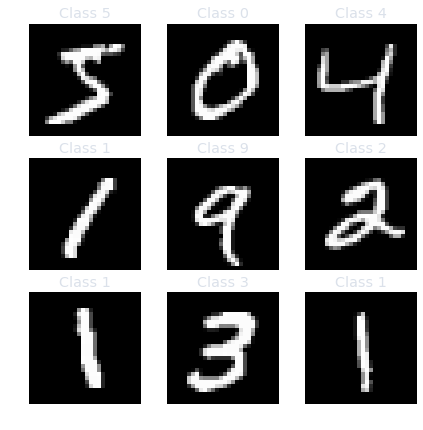

In [7]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))
    plt.axis('off')
    
plt.show()

In [8]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [9]:
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

# Build the neural network

Build the neural-network. Here we'll do a simple 3 layer fully connected network.
![GitHub Logo](https://github.com/wxs/keras-mnist-tutorial/blob/master/figure.png?raw=true)


In [10]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_1 (Dense)                  (None, 512)           401920      dense_input_1[0][0]              
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 512)           0           dense_1[0][0]                    
____________________________________________________________________________________________________
dropout_1 (Dropout)              (None, 512)           0           activation_1[0][0]               
____________________________________________________________________________________________________
dense_2 (Dense)                  (None, 512)           262656      dropout_1[0][0]                  
___________________________________________________________________________________________

In [11]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])


Connect to TensorBoard

In [12]:
tensorbaord = TensorBoard(log_dir='./logs', histogram_freq=0, write_graph=True, write_images=True)
callbacks_list = [tensorbaord]

## Train the model!
This is the fun part: you can feed the training data loaded in earlier into this model and it will learn to classify digits

In [13]:
history = model.fit(X_train, Y_train,
                    batch_size=batch_size, nb_epoch=nb_epoch,
                    verbose=1, callbacks=callbacks_list,
                    validation_data=(X_test, Y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s - loss: 0.2489 - acc: 0.9224 - val_loss: 0.1197 - val_acc: 0.9639
Epoch 2/20
60000/60000 [==============================] - 2s - loss: 0.1025 - acc: 0.9688 - val_loss: 0.0816 - val_acc: 0.9757
Epoch 3/20
60000/60000 [==============================] - 2s - loss: 0.0771 - acc: 0.9763 - val_loss: 0.0724 - val_acc: 0.9772
Epoch 4/20
60000/60000 [==============================] - 2s - loss: 0.0604 - acc: 0.9813 - val_loss: 0.0707 - val_acc: 0.9796
Epoch 5/20
60000/60000 [==============================] - 2s - loss: 0.0502 - acc: 0.9848 - val_loss: 0.0942 - val_acc: 0.9768
Epoch 6/20
60000/60000 [==============================] - 2s - loss: 0.0442 - acc: 0.9869 - val_loss: 0.0813 - val_acc: 0.9797
Epoch 7/20
60000/60000 [==============================] - 2s - loss: 0.0382 - acc: 0.9886 - val_loss: 0.0749 - val_acc: 0.9814
Epoch 8/20
60000/60000 [==============================] - 2s 

In [14]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
assert score[1] > 0.98

Test score: 0.109856175969
Test accuracy: 0.9841


## Inspecting the output

It's always a good idea to inspect the output and make sure everything looks sane. Here we'll look at some examples it gets right, and some examples it gets wrong.

In [15]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_classes = model.predict_classes(X_test)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

 9184/10000 [==========================>...] - ETA: 0s

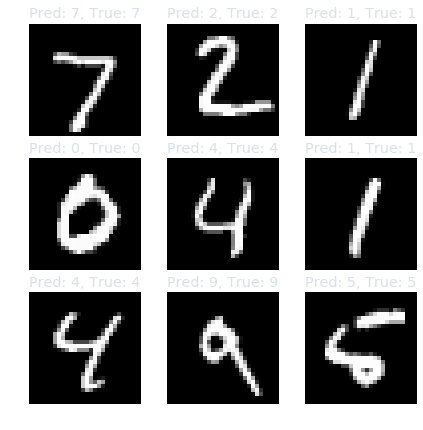

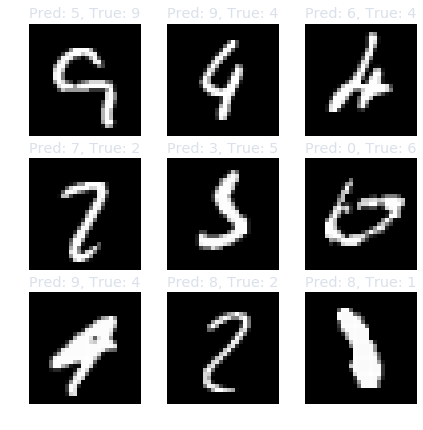

In [22]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Pred: {}, True: {}".format(predicted_classes[correct], y_test[correct]))
    plt.axis('off')
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Pred: {}, True: {}".format(predicted_classes[incorrect], y_test[incorrect]))
    plt.axis('off')
    
plt.show()

In [23]:
from IPython.display import HTML
import cv2
import numpy as np

def classify(img):
    img = img[len('data:image/png;base64,'):].decode('base64')
    img = cv2.imdecode(np.fromstring(img, np.uint8), -1)
    img = cv2.resize(img[3,:,:], (28,28))
    img = img.astype(np.float32).reshape((1,1,28,28))/255.0
    return model.predict(img)[0]


HTML(filename="keras/mnist_demo.html")

In [ ]:
model.predict(x_test[0])

## Convulution

In [ ]:
from keras.layers import Conv2D,MaxPooling2D,Flatten
from keras import backend as K

In [ ]:
# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_dim_ordering() == 'th' :
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

In [ ]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)


In [ ]:
model = Sequential()
 
model.add(Conv2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

Compile model.

We just need to compile the model and we'll be ready to train it. When we compile the model, we declare the loss function and the optimizer (SGD, Adam, etc.).

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Fit model on training data.

To fit the model, all we have to do is declare the batch size and number of epochs to train for, then pass in our training data.

In [ ]:
model.fit(x_train, Y_train, 
          batch_size=32, nb_epoch=10, verbose=1)

In [ ]:
score = model.evaluate(x_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

In [ ]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_classes = model.predict_classes(x_test)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

In [ ]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    
plt.show()